In [3]:
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
import os

import warnings
warnings.filterwarnings("ignore")

In [4]:
all_df=pd.read_csv("C:/Users/P-Koirala/OneDrive - Texas A&M Transportation Institute/Desktop/Data/SUP/#RAW/Data/All_Stations_Demographic.csv")

Landuse

https://data.tnris.org/collection?c=a6a703ba-df8b-4d1b-8d4c-ece8ae786505#5.21/31.32/-100.121

https://www.taxnetusa.com/research/texas/sptb.php

### Preparation

#### Joining incomplete data

In [3]:
#City Downloads: files downloaded from CAD websites
url="C:/Users/P-Koirala/OneDrive - Texas A&M Transportation Institute/Desktop/Data/SUP/#RAW/Data/Landuse/City Downloads/"

#### Joining all shape files and creating a Texas_Landuse file

In [4]:
path="C:/Users/P-Koirala/OneDrive - Texas A&M Transportation Institute/Desktop/Data/SUP/#RAW/Data/Landuse/All landuse"

In [8]:
data = []

# Process each folder
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    
    # Check if folder_path is a directory
    if os.path.isdir(folder_path):
        
        # Get first word of folder name
        folder_name = folder.split()[0]
        
        # Determine source based on second word
        if len(folder.split()) == 1:
            source = "City"
        elif folder.split()[1] == "County":
            source = "TNRIS"
        elif folder.split()[1].startswith("C"):
            source = "County tax appraisal office"
        else:
            source = "Unknown"
        
        # Add folder name and source to data list
        data.append({"Folder Name": folder_name, "Source": source})
        
# Create dataframe from data list
df = pd.DataFrame(data)

# Save dataframe as CSV
df.to_csv("output.csv", index=False)

In [66]:
# Create an empty list to store the data frames
df_list = []
sum=0
# Loop over all the sub-folders
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder, 'shp')
    
    # Loop over all the files in the sub-folder
    for file in os.listdir(folder_path):
        if file.endswith('.shp'):
            file_path = os.path.join(folder_path, file)
            
            # Load the shape file in the sub-folder
            df = gpd.read_file(file_path)
            print(sum)
            # Rename the columns
            if 'LU' in df.columns:
                df = df.rename(columns={'LU': 'LU'})
            elif 'STAT_LAND_' in df.columns:
                df = df.rename(columns={'STAT_LAND_': 'LU'})
            elif 'STATE_LAND_' in df.columns:
                df = df.rename(columns={'STATE_LAND_': 'LU'})
            elif 'stateCodes' in df.columns:
                df = df.rename(columns={'stateCodes': 'LU'})
            elif 'STATECODE' in df.columns:
                df = df.rename(columns={'STATECODE': 'LU'})
            elif 'State_Use_' in df.columns:
                df = df.rename(columns={'State_Use_': 'LU'})
            elif 'state_clas' in df.columns:
                df = df.rename(columns={'state_clas': 'LU'})
            df['county']=folder
            # Keep only the "geometry" and "LU" columns
            df = df[['geometry', 'LU', 'county']]
            df.geometry = df.geometry.to_crs(epsg=4326)
            # Add the data frame to the list
            df_list.append(df)
            sum+=1
            print("End")


0
End
1
End
2
End
3
End
4
End
5
End
6
End
7
End
8
End
9
End
10
End
11
End
12
End
13
End
14
End
15
End
16
End
17
End
18
End
19
End
20
End
21
End
22
End


In [67]:
# Concatenate all the data frames into a single data frame
texas_landuse = pd.concat(df_list, ignore_index=True)

# Write the data frame to a shape file
texas_landuse.to_file('Data/Landuse/Texas_landuse/Texas_landuse_raw.shp', driver='ESRI Shapefile')

### Renaming all

In [40]:
texas_landuse=gpd.read_file("Data/Landuse/Texas_landuse/Texas_landuse_raw.shp")

In [76]:
# Some of the LU are has more than one landuse code, we will only consider the first code and moveon
def extract_first_part(category):
    if pd.isna(category):
        return category
    else:
        return category.split(',')[0]


##### Among the Land use code sources use, two main ones are: <br>
1100 numeric code: 
https://water.usgs.gov/GIS/metadata/usgswrd/XML/ds240_landuse_poly.xml
Alphabetic code (Texas state)
https://www.taxnetusa.com/research/texas/sptb.php
<br>

In [166]:
def replacelu(texas_landuse):
    texas_landuse.LU = texas_landuse.LU.replace({
            #City 
            "A11": "residential",
            "A10": "residential",
            "A20": "residential",
            "A12": "residential",
            "A13": "residential",
            "B11": "residential",
            "B12": "residential",
            "C11": "vacant",
            "C12": "vacant",
            "C13": "vacant",
            "C14": "vacant",
            "D10": "vacant",
            "E11": "vacant",
            "F10": "commercial",
            "F20": "industrial",
            "G20": "industrial",
            "G30": "industrial",
            "J30": "industrial",
            "J40": "industrial",
            "J51": "vacant",
            "M31": "residential",
            "O10": "vacant",
            "O11": "vacant",
            "S10": "vacant",
            #State cd 
            'R': 'residential',#s
            'RO':'residential', #s
            "OA": "commercial", #s
            'A023':"residential",#s
            'A09':"residential",#s
            'A024':"residential", #s
            'F010':'commercial' ,#s
            'A01':"residential", #s
            'A022':"residential", #s
            'A018':"residential" ,#s
            'A00': "residential",#s
            'A05': "residential",#s
            'OA3': 'commercial',#s
            'OB2': 'commercial',#s
            'A021':"residential",#s
            'OA5': 'commercial',#s
            'A08':"residential",#s
            "A": "residential", #s
            "A1": "residential",
            "A2": "residential",
            "A3": "residential",
            "A4": "residential",
            "A5": "residential",#s
            "A6": "residential",#s
            "A7": "residential",#s
            "A8": "residential",#s
            "A9": "residential",#s
            'AC': "residential", #s
            'BC': "residential",#s
            "B": "residential", #s
            "B1": "residential",
            "B2": "residential",
            "B3": "residential",
            "B4": "residential",
            "B5": "residential",#s
            "B6": "residential",#s
            "B7": "residential",#s
            "B8": "residential",#s
            "B9": "residential",#s
            "B10": "residential",#s
            "C": "commercial",#s
            "C1": "vacant",
            "C2": "vacant",
            "C3": "vacant",
            "C4": "vacant",
            "C5": "vacant",
            "C6": "vacant",
            'C1I':"vacant", #s
            'C1C': "vacant", #s
            'C1S': "vacant", #s
            'D2N':'vacant',#s
            'D1N':"vacant",#s
            "D1": "vacant",
            "D2": "vacant",
            "D3": "vacant",#s
            "D4": "vacant",#s
            "D5": "vacant",#s
            "D6": "vacant",#s
            "D7": "vacant",#s
            'D8': 'vacant',#s
            'D9': 'vacant',#s
            'EC': "vacant",#s
            "E1": "vacant",
            "E2": "vacant",
            "E3": "vacant",
            "E4": "vacant",
            "E5": "vacant",
            "E6": "vacant",#s
            "E7": "vacant",
            "E8": "vacant",
            "E9": "vacant",#s
            "E": "vacant",#s
            "E3": "vacant",
            "EX": "vacant",#s
            'E5R': "vacant",#s
            'E5M': "vacant", #s
            'E1M': "vacant",#s
            "F": "commercial", #s
            "F1": "commercial",
            "F1H": "commercial",#s
            "F1M": "commercial",#s
            "F1X": "commercial",
            "F2": "industrial",
            "F3": "industrial",#s
            "F4": "industrial", #s
            "F5": "industrial",#s
            "F6": "industrial",#s
            "F7": "industrial",#s
            "F9": "industrial",#s
            "G1": "industrial",
            "G2": "industrial",
            "G3": "industrial",
            "J": "industrial",#s
            "J1": "industrial",
            "J2": "industrial",
            "J3": "industrial",
            "J4": "industrial",
            "J5": "industrial",
            "J6": "industrial",
            "J7": "industrial",
            "J7C": "industrial",#s
            "J8": "industrial",
            "J8C": "industrial",
            "L1": "commercial",
            "L1A": "commercial",
            "L1B": "commercial",
            "L1L": "commercial",
            "L1V": "commercial",
            "L2": "industrial",
            "L2C": "industrial",
            "L5": "industrial",
            "M1": "residential",
            "M2": "vacant",
            "M3": "residential",
            "M4": "vacant",
            "M5": "vacant",
            "M6": "vacant",
            "M7": "vacant",
            "M8": "vacant",
            "M9": "vacant",
            'PLAN': 'vacant', #s
            'OC1': "commercial", #s
            'OA1': "commercial",#s
            "O": "vacant", #s
            "O1":"vacant",
            "O2":"vacant",
            "01": "vacant",#s
            "S": "vacant",
            "X": "vacant",#s
            "XA": "residential",
            "XB": "commercial",
            "XC": "industrial",
            "XD": "residential",
            "XE": "residential",
            "XF": "commercial",
            "XG": "commercial",
            "XH": "vacant",
            "XI": "vacant",
            "XJ": "commercial",
            "XL": "commercial",
            "XM": "industrial",
            "XN": "vacant",
            "XO": "vacant",
            "XP": "vacant",
            "XQ": "vacant",
            "XR": "industrial",
            "XS": "industrial",
            "XT":"vacant",
            "XU": "commercial",
            "XV": "commercial",
            "X0": "commercial",
            "X1": "commercial",
            "X2": "commercial",
            "X3": "commercial",
            "X4": "industrial",
            "X5": "commercial",
            "X6": "commercial",
            "X7": "commercial",
            "X8": "commercial",
            "X9": "residential",
            "Z": "vacant",#s
            "SU": "vacant",#s
            "EB2": 'vacant', #s
            "EA2": 'vacant',#s
            "UN": "vacant", #s, originally was unknown
            'XV-R': 'commercial',#s
            'XV-C': 'commercial',#s
            'C10': 'commercial',#s
            'X23': 'commercial',#s
            'A51': 'industrial',#s
            'A53': 'industrial', #s
            'X21': 'commercial',#s
            'C8': 'commercial',#s
            'A56': 'industrial',#s
            'A54': 'industrial',#s
            'A5C': 'industrial', #s
            'X22': 'vacant',#s
            'A55': 'industrial',#s
            'C9': 'commercial', #s
            'C7': 'commercial',#s
            'Y7': 'unknown',#s
            'TMBR':"industrial", #s
            '1D1':"vacant" ,#s
            'Z3':"vacant",#s
            'Z1':"vacant" ,#s
            '1D':"vacant" ,#s
             #Y -unidentified category
        
    
            #LUC from florida cad 
            #NJDEP MODIFIED ANDERSON SYSTEM 2002 or 
            #Anderson, et al, 1976, A Land Use and Land Cover Classification System for Use with Remote Sensor Data
            "0": "vacant",
            "100": "residential",
            "6600": "industrial",
            "1000": "vacant",
            "1100": "residential",
            "2000": "commercial",
            "9600": "industrial",
            "2600": "commercial",
            "3900": "commercial",
            "1200": "commercial",
            "4100": "industrial",
            "5200": "industrial",
            "5000": "industrial",
            "5600": "industrial",
            "1330": "commercial",
            "2200": "commercial",
            "2100": "residential",
            "4200": "industrial",
            "6000": "vacant",
            "3600": "commercial",
            "7000": "vacant",
            "9100": "industrial",
            "7500": "residential",
            "3800": "vacant", #s, originally gulf course
            "2700": "commercial",
            "6200": "vacant",
            "1300": "commercial",
            "8000": "vacant",
            "1150": "commercial",
            "3500": "commercial",
            "3100": "commercial",
            "6500": "vacant",
            "8700": "commercial", #s, originally state (other tha military, forest, parks, recreational are, clz, etc)
            "6700": "industrial",
            "1122": "commercial",
            "3000": "industrial",
            "1120": "commercial",
            "2500": "commercial",
            "3300": "commercial",
            "1121": "commercial",
            "4300": "industrial",
            "4500": "industrial",
            "4800": "industrial",
            "6900": "industrial",
            "4600": "industrial",
            "8500": "commercial",
            "4700": "industrial",
            "3200": "commercial",
            "1110": "commercial",
            #some random individual From I-HAC  manually 



        #From I-HAC converted and manually checked

    "BA": "residential",
    "BA, DE": "residential",
    "BA, PF": "residential",
    "BA, PF, RF": "industrial",
    "BA, PF, SF": "residential",
    "BA, PF, WL": "vacant",
    "BA, PL, RF": "commercial",
    "BA, PWL": "residential",
    "BA, RF": "residential",
    "BA, RF, SF": "residential",
    "BA, RH": "commercial",

    "BA, RH, RL, RS": "residential",
    "BA, RL": "residential",
    "BF": "residential",#s
    "BF, BV": "commercial",
    "BF, BV, PU": "vacant",
    "BF, ML, PU, UN, WL": "residential",
    "BF, ML, UN, WL": "residential",
    "BF, PU": "residential",
    "BF, PU, RS": "residential",
    "BF, RS": "vacant",

    "BF, UN": "residential",
    "BF, UN, WL": "residential",
    "BF, UW": "residential",
    "BS": "vacant",#s
    "BV": "residential",#s
    "BV, ML": "vacant",
    "C1": "residential",
    "C1, RL": "residential",
    "C1, WF": "residential",
    "CL": "residential",

    "CL, CO": "residential",
    "CL, PF": "residential",
    "CL, PF, RL": "vacant",
    "CL, PF, RL, RS": "residential",
    "CL, PF, RL, RS, SF, UN": "vacant",
    "CL, PF, RS": "residential",
    "CL, RF": "residential",
    "CL, RH": "commercial",
    "CL, RL": "residential",
    "CL, RL, UN": "vacant",

    "CN":"commercial",#s
    "CN, ML": "vacant",
    "CN, PF, UW": "residential",
    "CN, RF": "commercial",
    "CN, RL": "residential",
    "CN, UW": "residential",
    "CN, WF": "residential",
    "CO":"residential",#s
    "CO, DE": "residential",
    "CO, ML, RH, WL": "vacant",
    "CO, PF, RS": "residential",
    "CO, RA": "residential",
    "CO, RF": "residential",
    "CO, RS": "residential",
    "CO, UN": "residential",
    "CO, UN, WL": "residential",
    "CO, UW": "residential",
    "CO, UW, WF": "residential",
    "CR": "residential",#s
    "D1":"residential",
    "D1, DE": "vacant",
    "D1, PF": "residential",
    "D1, PF, RS": "residential",
    "D1, RF": "residential",
    "D1, RH": "residential",
    "D1, RL": "residential",
    "D1, RW": "vacant",
    "D1, UN": "vacant",
    "D1, UW": "vacant",
    "DE": "residential",#s
    "DE, E1": "commercial",
    "DE, E1, RF, RH": "vacant",
    "DE, FR": "residential",
    "DE, PF": "residential",
    "DE, PF, RS": "residential",
    "DE, PL, RF": "residential",
    "DE, RA": "residential",
    "DE, RF": "residential",
    "DE, RF, RS": "residential",
    "DE, RH": "residential",
     "DE, RH, RL": "industrial",
    "DE, RL": "residential",
    "DE, RS": "residential",
    "DE, UN": "residential",
    "DE, UW, WF": "vacant",
    "DE, WF": "vacant",
    "DKM": "residential", #s
    "E1": "residential",
    "E1, IND": "industrial",
    "E1, PF": "residential",
    "E1, PF, SF": "residential",
    "E1, RF": "residential",
    "E1, RH": "residential",
    "E1, RH, UW": "residential",
    "E1, RL": "vacant",
    "E1, UN, WL": "vacant",
    "E2": "vacant",
    "E2, RH": "residential",
    "E2, RL": "industrial",
    "E5": "residential",#s
    "F2, F5, RA": "vacant",
    "F3": "vacant",
    "F3, RH": "vacant",
    "F5": "residential",
    "F5, PF": "residential",
    "F5, RH": "residential",
    "F6": "residential",
    "F6, RH": "residential",
    "F7, RH": "residential",
    "F8": "vacant",#s

    "FR":"industrial",#s
    "GB":"industrial",#s
    "GF":"industrial",#s
    "IC":"residential",#s
    "IL":"residential",#s
     "IL, RF": "vacant",
    "IL, RF, RL": "vacant",
    "IL, RF, RL, RS": "residential",
    "IND": "industrial",
    "IND, WL": "industrial",
    "ML": "residential",#s
    "ML, PF": "vacant",
    "ML, RL": "vacant",
    "ML, RL, UN": "residential",
    "ML, RL, WL": "residential",
    "ML, UN": "industrial",
    "ML, UN, UW": "vacant",
    "ML, UN, WL": "residential",
    "ML, UW": "residential",
    "ML, WF, WL": "residential",
    "ML, WL": "residential",
    "ML, WV": "residential",
    "OS, RL": "residential",
    "OT": "vacant",#s
    "OT, UW": "commercial",
    "PF": "residential",#s
    "PF, PL": "residential",
    "PF, RF, RS": "vacant",
    "PF, RH": "residential",
    "PF, RL": "residential",
    "PF, RL, RS": "residential",
    "PF, RL, SF": "residential",
    "PF, RS": "residential",
    "PF, RS, SF": "residential",
    "PF, RS, UW": "residential",

    "PF, SF": "residential",
    "PF, UN": "residential",
    "PF, UN, UW": "vacant",
    "PF, UW": "residential",
    "PL": "residential",#s
    "PL, RF": "residential",
    "PL, RH": "residential",
    "PL, RL": "residential",
    "PL, SF": "residential",
    "PU": "residential",#s
    "PU, UN": "residential",
    "PWL": "residential",#s
    "PWL, RL": "residential",
    "PWL, UN": "industrial",
    "R1, RL": "vacant",
    "RA": "residential",#s
    "RA, RH": "vacant",
    "RA, RH, RL": "vacant",
    "RA, RH, UW": "residential",
    "RA, RL": "vacant",
    "RA, UN": "vacant",
    "RA, WL": "residential",
    "RF": "residential",#s
    "RF, RH": "residential",
    "RF, RL": "residential",
    "RF, RL, RW": "residential",
    "RF, RS": "residential",
    "RF, RS, WF": "residential",
    "RF, RW": "residential",
    "RF, SF": "industrial",
    "RF, UN": "residential",
    "RF, UW": "residential",
    "RF, WL": "residential",
    "RH": "residential",#s
    "RH, RL": "residential",
     "RH, RS": "residential",
    "RH, UN": "residential",
    "RH, UN, WL": "commercial",
    "RH, UW": "residential",
    "RL": "residential",
    "RL, RS": "residential",
    "RL, RW": "residential",
    "RL, UN": "residential",
    "RL, UN, WF": "residential",
    "RL, UW": "industrial",
    "RL, WF": "residential",
    "RL, WL": "residential",
    "RL, WV": "residential",
    "RS": "residential",
    "RS, SF": "residential",
    "RS, WF": "residential",
    "RW": "vacant",#s
    "RW, WF": "vacant",#s
    "SF": "residential",#s 
    "TL": "residential",#s
    "UN": "residential",
    "UN, UW": "vacant",
    "UN, UW, WF": "industrial",
    "UN, WF": "vacant",
    "UN, WL": "residential",
    "UW": "residential",
    "UW, WF": "residential",
    "UW, WL": "residential",
    "UW, WV": "residential",
    "WF": "residential" ,#s

    #Manually identified by looking into h-gac corresponding codes
        'unknown':'vacant',
        'CDO': 'vacant',
        'WV': "residential", 
        'WL':"vacant", #s #Doubt: WL is present in agri, resi as well as vacant
        'R1': 'vacant', 
        'DS': 'vacant', 
        'IP': 'vacant', 
        'OS': 'residential', 
        'D-B2': 'residential',#s #since B2 residential
        'GC': 'commercial',#s #since c might be for commercial as GB and GF is 'residential'
       'UTL': "vacant", #s #since U 
        'NP': "vacant", 
        'L':'vacant', #s
    
        
    #The codes below (before next comment) is determined by comparing with OSM landuse data for whichita county, this might contain errors because OSM is crowdsourced and dynamic.
        "B14U": 'residential',
        "FAGA": 'residential',
        'FRST': "commercial",
        "FSLO": "residential",
        "BMIS": "residential",
        "FSWA": "residential",
        "FSJU": "residential",
        "FSMI": "residential",
        "D1F": "residential",
      "B14U": "residential",
    "FAGA": "residential",
    "FRST": "commercial",
    "FSLO": "residential",
    "BMIS": "residential",
    "FSWA": "residential",
    "FSJU": "residential",
    "FSMI": "residential",
    "D1F": "residential",
    "BDUP": "residential",
    "FFCO": "residential",
    "FFFA": "commercial",
    "FCRO": "residential",
    "FIWE": "residential",
    "FOBA": "commercial",
    "FRI1": "industrial",
    "FTFD": "industrial",
    "FCEM": "vacant",
    "FOCO": "residential",
    "D1C": "residential",
    "FEAM": "residential",
    "FTMF": "residential",
    "FCCS": "residential",
    "FASE": "commercial",
    "BQUD": "residential",
    "FFCL": "industrial",
    "FO1S": "residential",
    "FRS2": "commercial",
    "FSNU": "residential",
    "FFNG": "commercial",
    "FACA": "residential",
    "FRI2": "industrial",
    "FRS1": "residential",
    "FGPL": "residential",
    "FSAL": "residential",
    'FRGR': 'residential',
    'FFRE': 'commercial',
    'FO2S': 'commercial',
    'FSPS': 'residential',
    'D1F': 'vacant',
    'FRDE': 'commercial',
    'FRI2': 'industrial',
    'FTMF': 'industrial',
    'FRLA': 'residential',
    'FELO': 'residential',
    'B14D': 'residential',
    'FIMA': 'industrial',
    'FIFA': 'industrial',
    'FSJU': 'industrial',
    'FOVE': 'residential',
    'D1E': 'vacant',
    'FAGA': 'industrial',
    'FEGO': 'industrial',
    'FASA': 'industrial',
    'FEMO': 'commercial',
    'FSNU': 'vacant',
    'D1C': 'vacant',
    'FSGR': 'industrial',
    'FAUS': 'residential',
    'FFHA': 'residential',
    'FTFD': 'commercial',
    'FAUS': 'commercial',
    "FOCL": "residential",
    "D1C": "residential",
    "FIFA": "industrial",
    "B14U": "residential",
    "D1F": "residential",
    "FRS1": "commercial",
    "FFCO": "commercial",
    "FFCL": "commercial",
    "FRST": "commercial",
    "FCEM": "vacant",
    "FSMI": "residential",
    "FGPL": "industrial",
    "FOVE": "residential",
    "FEAM": "vacant",
    "FOCO": "industrial",
    "FAGA": "industrial",
    "FSLO": "industrial",
    "FO1S": "residential",
    "FTFD": "commercial",
    "FAUS": "residential",
    "B14D": "residential",
    "FRI1": "commercial",
    "FSJU": "residential",
    "FCRO": "residential",
    "BDUP": "residential",
    "FIWE": "industrial",
    "FEGO": "industrial",
    "FASA": "industrial",
    "FEMO": "commercial",
    "FSNU": "vacant",
    "FFHA": "residential",
    "FSGR": "industrial",
    "FFRE": "commercial",
    "FSWA": "industrial",
    "FSPS": "industrial",
    "FRMA": "commercial",
    "FSMO": "commercial",
    "D1B": "residential",
    #Self standarized using above as reference and using google maps, 
    #using #g for google maps checked landuse. #g_x = corrected using google:
    #value_counts() command was used to identify codes with the least number of counts and checked if they are vacant or industrial
    "FRHA": "commercial", #g
    "D1G": "vacant",#g_x
    "FODO": "residential",#g
    "FORE": "residential",#g
    "FSGA": "residential",
    "FRCL": "commercial", #g
    "FFLI": "commercial",
    "FTAI": "industrial", #g
    "FRFU": "industrial",
    "FRLU": "industrial",
    "BTRI": "residential",#g
    "FODE": "residential",
    "FSMH": "residential",
    "FSCH": "residential",#g
    "FAAU": "residential",
    "FRSC": "commercial",
    "FAFM": "commercial",#g
    "FRNU": "residential",
    "FOIN": "residential",
    "FOFI": "residential",
    "FEHE": "residential",#g
    "FIFO": "commercial",#g_x
    "FEST": "residential",
    "FFMA": "commercial", #g_x
    "FSL0": "vacant", #g_x
    "FERA": "vacant", #g_x
    "FANE": "residential",
    "FRDI": "residential",
    "FFGR": "residential",
    "FOPO": "commercial", #g_x
    "FSKE": "residential",
    "FLF4": "industrial", #g_x
    "FTTR": "industrial", #g_x
    "FESK": "vacant", #g_x
    "FSHO": "residential",
    "FSFU": "residential",#g
    "FTRE": "residential",
    "FLF1": "industrial",#g_x
    "D1O": "vacant", #s
    "FEBO": "vacant",#s
    "D3K": "vacant",
    "D1D": "vacant", #s
    "FTBU": "vacant",
    "FECO": "vacant", #g_x
       
        })
    return(texas_landuse)

In [187]:
texas_landuse1=texas_landuse.copy(deep=True)
texas_landuse1.LU=texas_landuse1.LU.astype(str)
#Converting LU to standard code without splitting (ie without using extract_first_part)
texas_landuse1=replacelu(texas_landuse1)
# Some land use codes have multiple codes. If any remaining landuse code was not converted then the code which contain double codes such as "RA RS" then they are split and the first code "RA" is used for conversion.
#The extract_first_part splits codes with two or more codes and keeps the first one.
texas_landuse1.LU=texas_landuse1.LU.apply(extract_first_part)
texas_landuse2=replacelu(texas_landuse1)

In [188]:
#Treating missing Landuse data with a 'vacant'
texas_landuse2.loc[(texas_landuse2.LU.isna()), 'LU']='vacant'

In [189]:
texas_landuse2.to_file('Data/Landuse/Texas_landuse/Texas_landuse_standardized.shp', driver='ESRI Shapefile')

### Calculation

In [12]:
texas_landuse2=gpd.read_file('Data/Landuse/Texas_landuse/Texas_landuse_standardized.shp')

In [13]:
texas_landuse2.to_crs(epsg=2277, inplace=True)

#### Calculating new variables

In [32]:
#importing station locations
df_al=pd.read_excel("C:/Users/P-Koirala/OneDrive - Texas A&M Transportation Institute/Desktop/Data/SUP/#RAW/Data/FullSUPIdentifiedData.xlsx")
df_all=df_al[['stationid', 'Latitude', 'Longitude','county']]
df_all=df_all.drop_duplicates(subset=['stationid'], keep='first')
df_all.reset_index(drop=True, inplace=True)
gdf_all=gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.Longitude, df_all.Latitude), crs='EPSG:4326')
gdf_all.to_crs(epsg=2277, inplace=True)

In [45]:
#Since local land use data was not collected for lamar and starr we exclude them while calculating the landuse areas for each county.
gdf_all=gdf_all[(gdf_all.county!='Lamar') & (gdf_all.county!='Starr')]

In [46]:
gdf_all.county.unique()

array(['Travis', 'Harris', 'Dallas', 'Danton', 'Tarrant', 'Collin',
       'Bexar', 'Bowie', 'Bryan', 'Cameron', 'Ector', 'El Paso',
       'Fort Bend', 'Galveston', 'Hays', 'Hidalgo', 'Lubbock', 'McLennan',
       'Midland', 'Nueces', 'Washington', 'Webb', 'Wichita', 'Williamson'],
      dtype=object)

In [47]:
#Buffer
stations_buffer=gdf_all.copy(deep=True)
stations_buffer.geometry=stations_buffer.geometry.buffer(5280) #5280ft ~ 1mile

In [111]:
buffer_radii = [1320, 2640, 5280]
buffer_radii_name = ['025mile','05mile','1mile']
#Since local land use data was not collected for lamar and starr we exclude them while calculating the landuse areas for each county.
gdf_all=gdf_all[(gdf_all.county!='Lamar') & (gdf_all.county!='Starr')]
#Our final datatse
df=pd.DataFrame(index=range(len(gdf_all)))
#Function to calculate the area for each landuse type for each buffer size and entropy
for buffer_radius, buffer_radius_name in zip(buffer_radii, buffer_radii_name):
    stations_buffer = gdf_all.copy(deep=True)
    stations_buffer.geometry = gdf_all.geometry.buffer(buffer_radius)
    stations_buffer['indexx']=stations_buffer.index
    texas_landuse2["geometry"] = texas_landuse2.geometry.buffer(0)
    stations_buffer["geometry"] = stations_buffer.geometry.buffer(0)
    #Overlay
    inter = gpd.overlay(texas_landuse2,stations_buffer, how='intersection')
    inter["area"]=inter.geometry.area
    inter['area'] = pd.to_numeric(inter['area'], errors='coerce').fillna(0) #This code is added as the code below was not running properly, it is just trying to make sure everything is numeric
    f={
        'area':'sum',
        'county_2':'first'
    }
    DF=inter.groupby(['stationid','LU'], as_index=False).agg(f)
    DF.LU=DF.LU.replace({'nan':'vacant'}) #
    #pivoting to make each LU type as a column
    DF = DF.pivot_table(index='stationid', columns=['LU'], values='area', aggfunc=np.sum, fill_value=0)
    DF.reset_index(inplace=True)
    #Entropy calculation
    DF['sum_area'] = DF['residential'] + DF['commercial'] + DF['industrial'] + DF['vacant']
    DF_=(DF[['residential','commercial','industrial','vacant']]).div(DF['sum_area'], axis=0)
    DF1=DF[['stationid','residential','commercial','industrial','vacant']] #using county 2 as it is from stations_buffer in overlay
    DF1['lu_local_entropy']=-1*(np.log(DF_)*DF_).sum(axis=1)/np.log(4)
    DF1.rename(columns={'residential':'lu_local_res_'+buffer_radius_name,
                       'commercial':'lu_local_com_'+buffer_radius_name,
                       'industrial':'lu_local_ind_'+buffer_radius_name,
                       'vacant':'lu_local_vac_'+buffer_radius_name,
                       'lu_local_entropy':'lu_local_entropy_'+buffer_radius_name}, inplace=True)
    df=pd.concat([df,DF1],axis=1)




In [106]:
DF2=df.copy(deep=True)
#delete doublicate statoinid
#desired_stationid_index = 0
column_names = DF2.columns.tolist()
stationid_indices = [i for i, name in enumerate(column_names) if name == 'stationid']
# Remove the desired_stationid_index from the list of indices to drop
stationid_indices.remove(desired_stationid_index)
# Drop the unwanted stationid columns using iloc
DF2 = DF2.drop(DF2.iloc[:, stationid_indices], axis=1)

In [110]:
DF2.head()

,lu_local_res_025mile,lu_local_com_025mile,lu_local_ind_025mile,lu_local_vac_025mile,lu_local_entropy_025mile,lu_local_res_05mile,lu_local_com_05mile,lu_local_ind_05mile,lu_local_vac_05mile,lu_local_entropy_05mile,lu_local_res_1mile,lu_local_com_1mile,lu_local_ind_1mile,lu_local_vac_1mile,lu_local_entropy_1mile
0,2.129122e+04,2.517554e+06,0.000000,1.884723e+06,0.512142,2.825418e+06,7.413047e+06,0.000000e+00,6.915680e+06,0.740010,1.948942e+07,1.764970e+07,1.325756e+05,3.077871e+07,0.778435
1,2.753178e+06,0.000000e+00,0.000000,2.031571e+06,0.491765,1.222791e+07,5.254258e+05,0.000000e+00,4.356932e+06,0.501610,3.989582e+07,9.509555e+06,1.457229e+05,1.628628e+07,0.679577
2,1.580224e+06,6.216775e+05,0.000000,2.641773e+06,0.692182,1.047685e+07,9.145547e+05,0.000000e+00,7.411237e+06,0.605847,4.207244e+07,4.013598e+06,0.000000e+00,1.212467e+07,0.538003
3,2.543589e+06,8.426645e+05,0.000000,7.803508e+05,0.676805,9.394235e+06,6.123034e+06,0.000000e+00,1.402401e+06,0.649879,3.247937e+07,2.532330e+07,0.000000e+00,8.653174e+06,0.709081
4,2.113178e+06,1.625816e+06,0.000000,0.000000e+00,0.493855,7.449574e+06,7.274559e+06,0.000000e+00,8.760007e+05,0.627866,3.072987e+07,2.794463e+07,0.000000e+00,6.228216e+06,0.679316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2.643265e+06,5.131810e+05,0.000000,1.241372e+06,0.659098,8.879301e+06,1.409203e+06,0.000000e+00,9.265072e+06,0.650613,4.513530e+07,1.416991e+06,3.353684e+05,3.456378e+07,0.565522
662,6.905148e+05,0.000000e+00,485052.077963,3.509785e+06,0.529026,1.845595e+06,1.630829e+03,5.286722e+06,1.237625e+07,0.624978,1.886966e+07,2.290349e+06,2.881662e+07,2.805573e+07,0.852995
663,4.267316e+05,4.277502e+06,265346.888890,0.000000e+00,0.358028,5.913129e+06,1.183904e+07,3.261971e+05,1.843782e+04,0.521172,3.802351e+07,3.876079e+07,5.348452e+05,1.170451e+06,0.574366
664,2.823910e+06,1.742501e+06,0.000000,1.239471e+06,0.751242,1.404364e+07,4.231653e+06,0.000000e+00,1.616429e+06,0.561936,5.845532e+07,1.416577e+07,2.159376e+04,2.755166e+06,0.457850


In [109]:
DF.to_csv('Data/Temp/FULL_localanduse_v1.csv', index=False)

[6, 12]

### Checking OSM for landuse data  and visualizing

In [7]:
df_stations=pd.read_excel("C:/Users/P-Koirala/OneDrive - Texas A&M Transportation Institute/Desktop/Data/SUP/#RAW/Data/FullSUPIdentifiedData.xlsx", sheet_name="SUPData", usecols=["stationid","sharedpath","county", "Latitude",'Longitude'])
df_stations=df_stations[df_stations.sharedpath==1]
gdf_stations=gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations.Longitude, df_stations.Latitude), crs='EPSG:4326')
#gdf_stations=gdf_stations.to_crs("EPSG:2277")

In [8]:
tags = {"landuse": True}
gdf = ox.geometries_from_place("Dallas,Texas,USA", tags)


In [9]:
a=gdf_stations[gdf_stations.county=="Dallas"]

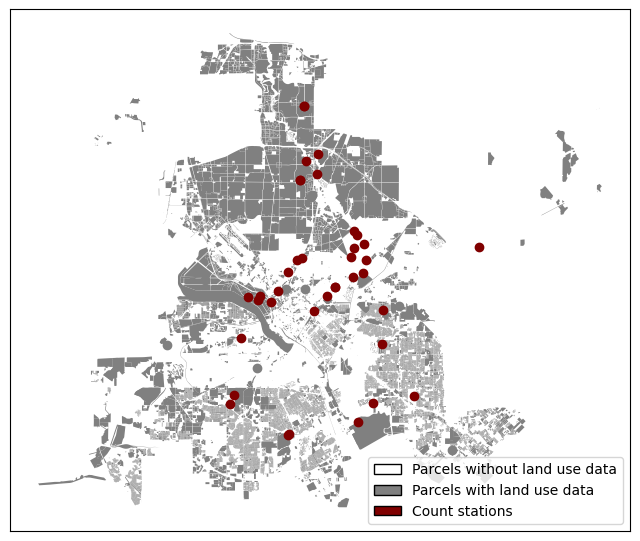

In [11]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 12))
gdf.plot(ax=ax, color="grey")
a.plot(ax=ax, color="maroon")
legend_elements = [ Patch(facecolor='white', edgecolor='black', label='Parcels without land use data'),
                    Patch(facecolor='grey', edgecolor='black', label='Parcels with land use data'),
                   Patch(facecolor="#800000", edgecolor='black', label='Count stations'),
                
                   ]
plt.legend(handles=legend_elements, loc='lower right')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [70]:
tags = {"landuse": True}
gdf = ox.geometries_from_place("Paris,Texas,USA", tags)

In [71]:
a=gdf_stations[gdf_stations.county=="Lamar"] #WACO

In [72]:
gdf_stations.county.unique()

array(['Travis', 'Harris', 'Dallas', 'Danton', 'Tarrant', 'Collin',
       'Bexar', 'Bryan', 'Cameron', 'Ector', 'El Paso', 'Fort Bend',
       'Galveston', 'Hays', 'Hidalgo', 'Lamar', 'Lubbock', 'Midland',
       'Nueces', 'Starr', 'Washington', 'Wichita', 'Williamson'],
      dtype=object)

In [73]:
a

,stationid,county,Latitude,Longitude,sharedpath,geometry
546,PQ0006,Lamar,33.647730,-95.526750,1,POINT (-95.52675 33.64773)
547,PQ0005,Lamar,33.643030,-95.523130,1,POINT (-95.52313 33.64303)
548,PQ0004,Lamar,33.650840,-95.552290,1,POINT (-95.55229 33.65084)
549,PQ0003,Lamar,33.649381,-95.543776,1,POINT (-95.54378 33.64938)
550,PQ0002,Lamar,33.651310,-95.556110,1,POINT (-95.55611 33.65131)
551,PQ0001,Lamar,33.646683,-95.515651,1,POINT (-95.51565 33.64668)


<AxesSubplot: >

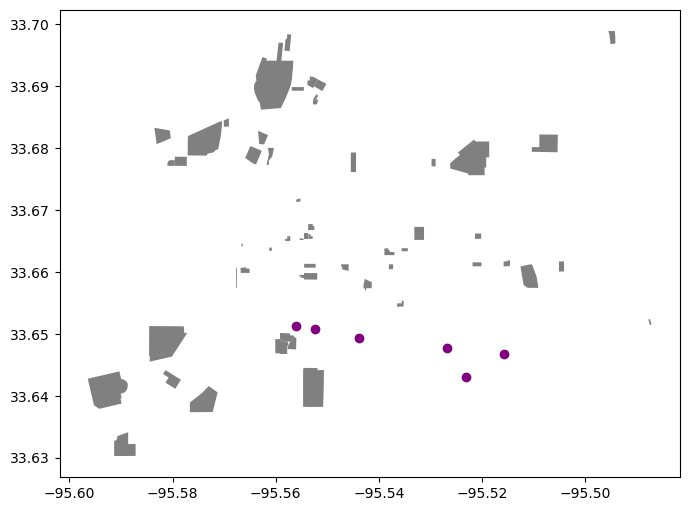

In [74]:
fig, ax=plt.subplots(1, figsize=(8,10))
gdf.plot(ax=ax, color="grey")
a.plot(ax=ax, color="purple")

#### Rough 2, preparing county shp files before joining

In [ ]:
# #import Dallas
# dallas_shp=gpd.read_file(url+"Dallas C/PARCEL/PARCEL.shp")
# dallas_csv=pd.read_csv(url+"Dallas C/DCAD2023_CURRENT/LAND.csv")
# dallas_csv=dallas_csv.rename(columns={"ACCOUNT_NUM":"Acct"})
# #Merge
# dallas_=dallas_shp.merge(dallas_csv, on="Acct")
# dallas=dallas_[['geometry','SPTD_CD']]
# dallas.to_file(url+"Dallas C/shp_/dallas.shp")
# #dictionary
# descriptive=dallas_[["SPTD_DESC",'SPTD_CD']]
# df_dict = descriptive.drop_duplicates(subset='SPTD_CD', keep='first').reset_index(drop=True)
# df_dict.to_csv(url+"Dallas C/shp_dictionary2.csv")

# dallas=dallas.rename(columns={"SPTD_CD":"LU"})
# dallas.to_file(url+"Dallas C/shp_/dallas.shp")

# #import McLennan SHP
# ml_shp=gpd.read_file(url+"McLennan C/McLennan_GIS/Parcels.shp")
# #Reading and claening TXT file for LU
# widths = [12,16,2,8, 14,11,2, 61]
#     # read the data into a dataframe
# df = pd.read_fwf(url+"McLennan C/LAND_DETAIL.txt", widths=widths, header=None)
#     # set column names
# col_names = ['PROP_ID', 'field2', 'field3', 'field4', 'field5', 'field6', 'LU','field8']
# df.columns = col_names
# ml_csv=df[['PROP_ID','LU']]
# #Merge
# ml=ml_shp.merge(ml_csv, on="PROP_ID")
# ml=ml[['geometry', 'LU']]
# ml.to_file(url+"McLennan C/shp_/McLennan.shp", index=False)

# #Williamson
# wil_shp=gpd.read_file(url+"Williamson C/Parcel_poly/Parcel_poly.shp")
# wil_csv=pd.read_csv(url+"Williamson C/Certified_Property_Data_Land.csv")
# wil_csv=wil_csv.rename(columns={"QuickRefID":"PARCELID", "StateCode":"LU"})
# wil=wil_shp.merge(wil_csv, on="PARCELID")
# wil=wil[['geometry', 'LU']]
# wil.to_file(url+"Williamson C/shp_/Williamson.shp", index=False)